<a href="https://colab.research.google.com/github/Vishnu-2704/codeway-machine-learning/blob/main/CREDIT_CARD_FRAUD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
fraud_train = pd.read_csv("/content/drive/MyDrive/archive (2)/fraudTrain.csv")
fraud_test = pd.read_csv("/content/drive/MyDrive/archive (2)/fraudTest.csv")

In [ ]:
fraud_train.drop(columns=["Unnamed: 0", "trans_num", "unix_time"], inplace=True)
fraud_test.drop(columns=["Unnamed: 0", "trans_num", "unix_time"], inplace=True)

In [ ]:
combined_data = pd.concat([fraud_train, fraud_test], ignore_index=True)


In [ ]:
label_encoders = {}
for column in combined_data.select_dtypes(include=["object"]).columns:
    label_encoders[column] = LabelEncoder()
    combined_data[column] = label_encoders[column].fit_transform(combined_data[column])

In [ ]:
train_data = combined_data[:len(fraud_train)]
test_data = combined_data[len(fraud_train):]

In [ ]:
X_train = train_data.drop(columns=["is_fraud"])
y_train = train_data["is_fraud"]
X_test = test_data.drop(columns=["is_fraud"])
y_test = test_data["is_fraud"]

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

In [ ]:
y_pred = rf_classifier.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9970920555172669
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.72      0.41      0.52      2145

    accuracy                           1.00    555719
   macro avg       0.86      0.70      0.76    555719
weighted avg       1.00      1.00      1.00    555719



In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [ ]:
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.9970920555172669


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[553225    349]
 [  1267    878]]


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.72      0.41      0.52      2145

    accuracy                           1.00    555719
   macro avg       0.86      0.70      0.76    555719
weighted avg       1.00      1.00      1.00    555719



In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

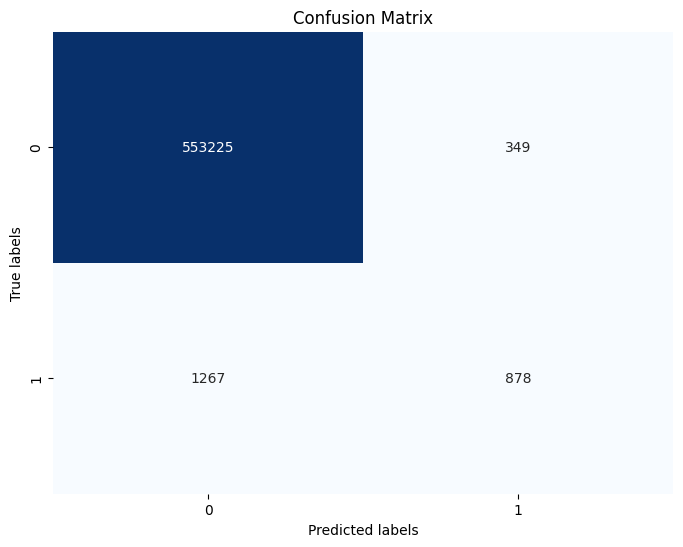

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import pandas as pd


In [ ]:
new_data = pd.DataFrame({
    'amt': [29.0],  # Amount of transaction
    'category': ['entertainment'],  # Transaction category
    'first': ['Jeff'],  # First name
    'last': ['Elliott'],  # Last name
    'gender': ['M'],  # Gender
    'street': ['351 Darlene Green'],  # Street address
    'city': ['Columbia'],  # City
    'state': ['SC'],  # State
    'zip': [29209],  # Zip code
    'lat': [33.9659],  # Latitude
    'long': [-80.9355],  # Longitude
    'city_pop': [333497],  # City population
    'job': ['Mechanical engineer'],  # Job
    'dob': ['1968-03-19'],  # Date of birth
    'trans_date_trans_time':['2019-01-01 00:00:18'],
    'cc_num':['2703186189652095'],
    'merchant':['fraud_Rippin, Kub and Mann'],
    'merch_lat':['36.011293'],
    'merch_long':['-82.048315	'],
})

In [ ]:
new_data = new_data[X_train.columns]

In [ ]:
for column in new_data.select_dtypes(include=["object"]).columns:
    try:
        new_data[column] = label_encoders[column].transform(new_data[column])
    except KeyError:
       new_data[column] = -1

In [ ]:
new_data_scaled = scaler.transform(new_data)

In [ ]:
prediction = rf_classifier.predict(new_data_scaled)


In [ ]:
print("Predicted label:", prediction)


Predicted label: [0]


In [ ]:
fraud_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0
